In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [309]:
data = pd.read_csv('csv_files/processed_data.csv',index_col=0)

In [261]:
data.head()

,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,...,BLK_home,PF_home,STL_home,TO_home,BLK_away,PF_away,STL_away,TO_away,HOME_TEAM,VISITOR_TEAM
0,2019,85.00000,0.35400,0.90000,0.22900,22.00000,47.00000,93.00000,0.40200,0.76200,...,8.00000,18.00000,7.00000,10.00000,6.00000,11.00000,7.00000,16.00000,Hornets,Bucks
1,2019,103.00000,0.37200,0.83300,0.35900,24.00000,39.00000,116.00000,0.50600,0.75000,...,3.00000,22.00000,6.00000,13.00000,8.00000,22.00000,8.00000,15.00000,Hornets,Bucks
2,2013,111.00000,0.43400,0.75000,0.58800,30.00000,43.00000,110.00000,0.43300,0.94100,...,7.00000,17.00000,2.00000,8.00000,8.00000,23.00000,8.00000,12.00000,Hornets,Bucks
3,2013,92.00000,0.44300,0.61300,0.20000,20.00000,54.00000,76.00000,0.33300,0.75000,...,4.00000,17.00000,5.00000,17.00000,9.00000,22.00000,10.00000,9.00000,Hornets,Bucks
4,2012,95.00000,0.46300,0.70800,0.44400,23.00000,52.00000,85.00000,0.39100,0.66700,...,5.00000,18.00000,6.00000,14.00000,3.00000,20.00000,6.00000,12.00000,Hornets,Bucks


# Descriptive Statistics

## 2019 Stats vs 2004-2018 Stats

In [262]:
# split data into training(2003 - 2018 games) and test data(2019 games)
season_2004_2018 = data[data['SEASON'] != 2019].drop('SEASON',axis=1)
season_2019 = data[data['SEASON'] == 2019].drop('SEASON',axis=1)

In [263]:
stats_2004_2018

FG_PCT         0.45380
FT_PCT         0.75659
FG3_PCT        0.35194
TOTAL_PTS    100.19988
TOTAL_REBS    42.40030
TOTAL_ASTS    21.69703
Name: 2004_2018, dtype: float64

In [264]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
stats_2004_2018 = season_2004_2018.describe()

stats_2004_2018['FG_PCT'] = (stats_2004_2018['FG_PCT_home'] + stats_2004_2018['FG_PCT_away'])/2
stats_2004_2018['FT_PCT'] = (stats_2004_2018['FT_PCT_home'] + stats_2004_2018['FT_PCT_away'])/2
stats_2004_2018['FG3_PCT'] = (stats_2004_2018['FG3_PCT_home'] + stats_2004_2018['FG3_PCT_away'])/2
stats_2004_2018['TOTAL_PTS'] = (stats_2004_2018['PTS_home'] + stats_2004_2018['PTS_away'])/2
stats_2004_2018['TOTAL_ASTS'] = (stats_2004_2018['AST_home'] + stats_2004_2018['AST_away'])/2
stats_2004_2018['TOTAL_REBS'] = (stats_2004_2018['REB_home'] + stats_2004_2018['REB_away'])/2

print('2004 - 2018')
stats_2004_2018 = stats_2004_2018[['FG_PCT','FT_PCT','FG3_PCT','TOTAL_PTS','TOTAL_REBS','TOTAL_ASTS']].loc['mean',:].rename('2004_2018')
stats_2004_2018

2004 - 2018


FG_PCT         0.45380
FT_PCT         0.75659
FG3_PCT        0.35194
TOTAL_PTS    100.19988
TOTAL_REBS    42.40030
TOTAL_ASTS    21.69703
Name: 2004_2018, dtype: float64

In [265]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
stats_2019 = season_2019.describe()

stats_2019['FG_PCT'] = (stats_2019['FG_PCT_home'] + stats_2019['FG_PCT_away'])/2
stats_2019['FT_PCT'] = (stats_2019['FT_PCT_home'] + stats_2019['FT_PCT_away'])/2
stats_2019['FG3_PCT'] = (stats_2019['FG3_PCT_home'] + stats_2019['FG3_PCT_away'])/2
stats_2019['TOTAL_PTS'] = (stats_2019['PTS_home'] + stats_2019['PTS_away'])/2
stats_2019['TOTAL_ASTS'] = (stats_2019['AST_home'] + stats_2019['AST_away'])/2
stats_2019['TOTAL_REBS'] = (stats_2019['REB_home'] + stats_2019['REB_away'])/2

print('2019 (First 66 Games)')
stats_df_2019 = stats_2019[['FG_PCT','FT_PCT','FG3_PCT','TOTAL_PTS','TOTAL_REBS','TOTAL_ASTS']].loc['mean',:].rename('2019')
stats_df_2019

2019 (First 66 Games)


FG_PCT         0.45896
FT_PCT         0.76713
FG3_PCT        0.35550
TOTAL_PTS    111.18083
TOTAL_REBS    45.07876
TOTAL_ASTS    24.30777
Name: 2019, dtype: float64

In [266]:
stats_df = pd.concat([stats_2004_2018,stats_df_2019],axis=1)
stats_df

,2004_2018,2019
FG_PCT,0.45380,0.45896
FT_PCT,0.75659,0.76713
FG3_PCT,0.35194,0.35550
TOTAL_PTS,100.19988,111.18083
TOTAL_REBS,42.40030,45.07876
TOTAL_ASTS,21.69703,24.30777


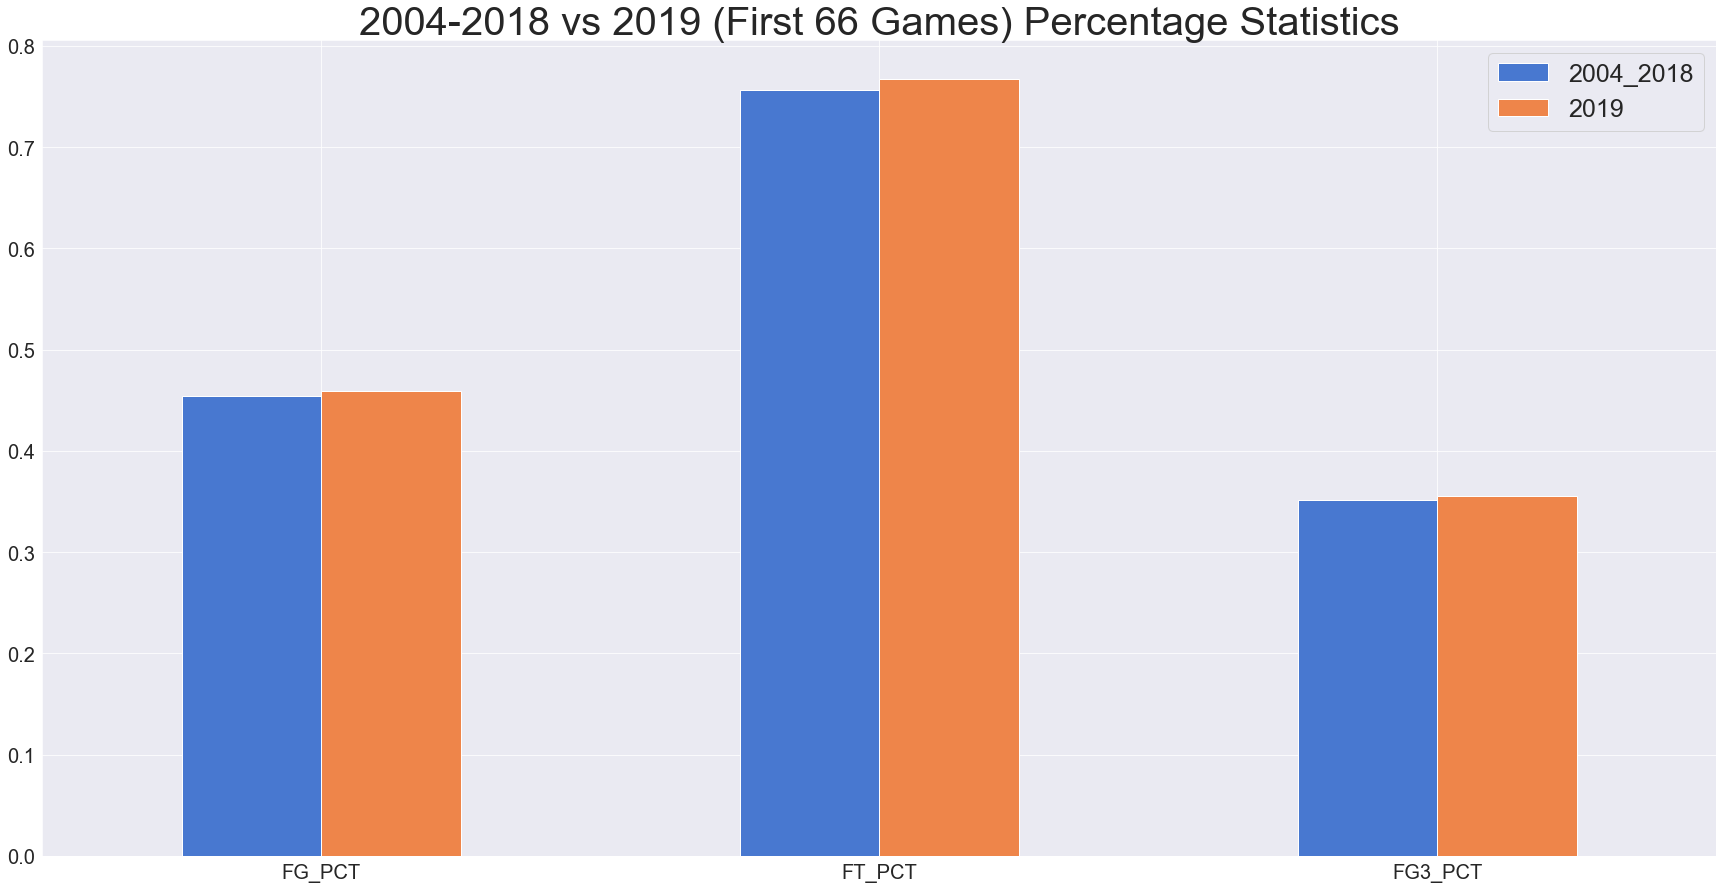

In [267]:
stats_df.loc[['FG_PCT','FT_PCT','FG3_PCT']].plot(kind='bar',stacked=False,figsize=(30,15))
plt.xticks(size=20,rotation=0)
plt.yticks(size=20)
# plt.xlabel('Statistics',fontsize=15)
# plt.ylabel('Percentage(%)',fontsize=15)
plt.title('2004-2018 vs 2019 (First 66 Games) Percentage Statistics',fontsize=40)
plt.legend(fontsize=25)
plt.savefig('images/percentage_statistics.png')
plt.show();

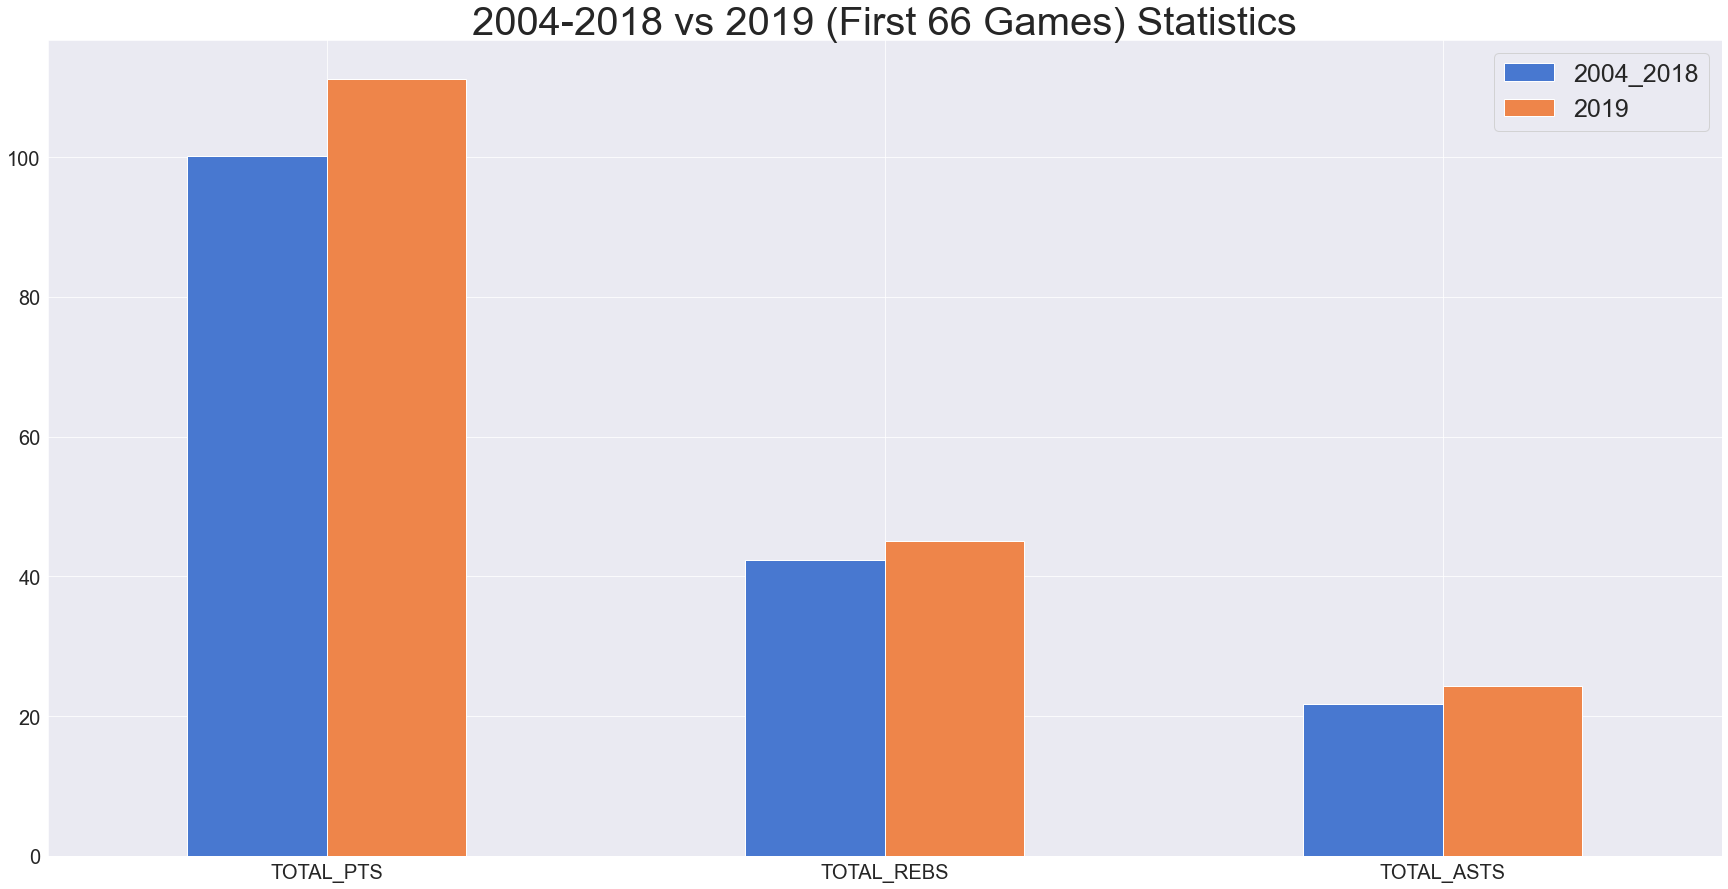

In [268]:
stats_df.loc[['TOTAL_PTS','TOTAL_REBS','TOTAL_ASTS']].plot(kind='bar',stacked=False,figsize=(30,15))
plt.xticks(size=20,rotation=0)
plt.yticks(size=20)
# plt.xlabel('Statistics',fontsize=15)
# plt.ylabel('Count',fontsize=15)
plt.title('2004-2018 vs 2019 (First 66 Games) Statistics',fontsize=40)
plt.legend(fontsize=25)
plt.savefig('images/general_statistics.png')
plt.show();

Based on the descriptive statistics above:
* Every average stat at home is better than average stat away
    * REB_home (43.06) > REB_away (41.74)
    * AST_home (22.41) > AST_away (20.98)
    * FG_PCT_home (0.4597) > FG_PCT_away (0.4478)
    * FT_PCT_home (0.7575) > FT_PCT_away (0.7556)
    * FG3_PCT_home (0.3552) > FG3_PCT_away (0.3485)

* Home
    * 2019_REB_home (45.79) > 16_REB_home (43.06)
    * 2019_AST_home (24.82) > 16_AST_home (22.41)
    * 2019_FG_PCT_home (0.4639) > 16_FG_PCT_home (0.4597)
    * 2019_FT_PCT_home (0.7657) > 16_FT_PCT_home (0.7575)
    * 2019_FG3_PCT_home (0.3592) > 16_FG3_PCT_home (0.3552)
* Away
    * 2019_REB_away (44.36) > 16_REB_away (41.74)
    * 2019_AST_away (23.78) > 16_AST_away (20.98)
    * 2019_FG_PCT_away (0.4539) > 16_FG_PCT_away (0.4478)
    * 2019_FT_PCT_away (0.7684) > 16_FT_PCT_away (0.7556)
    * 2019_FG3_PCT_away (0.3517) > 16_FG3_PCT_away (0.3485)

# FG Percentage Per Team in 2019-2020 Season (First 66 Games)

In [269]:
def team_FG(season, team, data):
    
    team_data = data[(data['HOME_TEAM'] == team) | (data['VISITOR_TEAM'] == team)]
    team_data = team_data[team_data['SEASON'] == season]

    team_home = team_data[team_data['HOME_TEAM'] == team]
    team_away = team_data[team_data['VISITOR_TEAM'] == team]
    
    FG = []

    for FG_home in team_home['FG_PCT_home']:
        FG.append(FG_home)
    for FG_away in team_away['FG_PCT_away']:
        FG.append(FG_away)

    return team,round(sum(FG)/len(FG),4)

def list_team_FG_season(season, data,list_teams):
    FG = {}
    for team in list_teams:
        result = team_FG(season,team,data)
        FG[result[0]] = result[1]
    return FG

In [270]:
list_team_FG_2019 = list_team_FG_season(2019,data,data['HOME_TEAM'].unique())
list_team_FG_2019 = {k: v for k, v in sorted(list_team_FG_2019.items(), key=lambda item: item[1])}
list_team_FG_2019

{'Hornets': 0.4319,
 'Warriors': 0.4342,
 'Timberwolves': 0.4355,
 'Magic': 0.4357,
 'Knicks': 0.4422,
 'Nets': 0.4445,
 'Bulls': 0.4447,
 'Hawks': 0.4472,
 'Rockets': 0.4549,
 'Cavaliers': 0.4551,
 'Kings': 0.4574,
 'Raptors': 0.4581,
 'Pistons': 0.4583,
 'Mavericks': 0.4597,
 'Trail Blazers': 0.4599,
 'Wizards': 0.462,
 'Suns': 0.4623,
 'Clippers': 0.4628,
 '76ers': 0.4642,
 'Celtics': 0.4648,
 'Pelicans': 0.4664,
 'Grizzlies': 0.4677,
 'Spurs': 0.468,
 'Nuggets': 0.4715,
 'Thunder': 0.4716,
 'Heat': 0.4727,
 'Jazz': 0.4742,
 'Pacers': 0.4771,
 'Lakers': 0.4818,
 'Bucks': 0.4839}

In [271]:
team_names = list(list_team_FG_2019.keys())
FG_percentage = list(list_team_FG_2019.values())

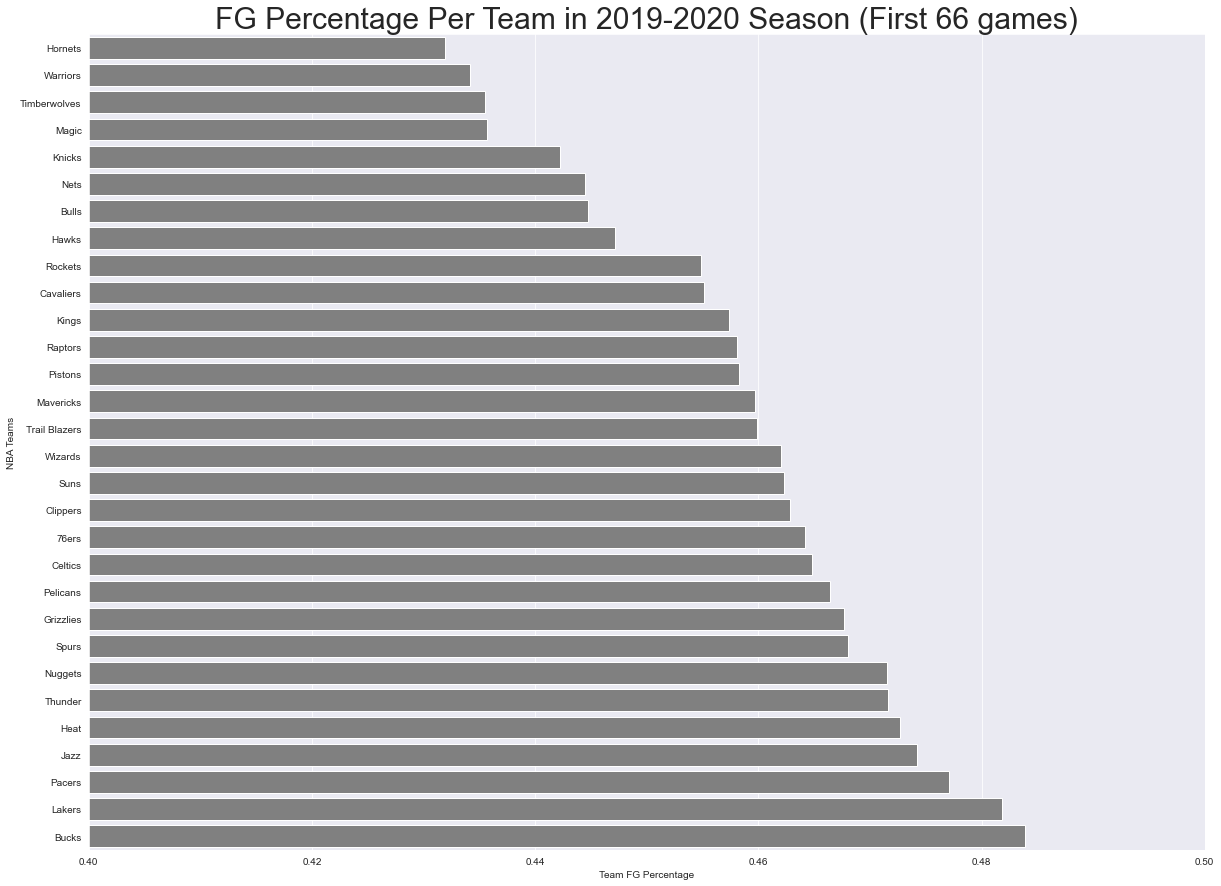

In [272]:
fig = plt.figure(figsize=(20,15))
ax = sns.barplot(x=FG_percentage,y=team_names,color='gray')
ax.set(xlim=(0.4,0.5),ylabel='NBA Teams',xlabel='Team FG Percentage')
ax = plt.title('FG Percentage Per Team in 2019-2020 Season (First 66 games)',fontsize=30)
plt.savefig('images/FG_percentage_team_2019.png')
plt.show()

In [273]:
east_teams_in_2019_playoffs = ['Bucks','Pacers','Heat','Celtics','76ers','Raptors','Nets','Magic']
west_teams_in_2019_playoffs = ['Lakers','Jazz','Thunder','Nuggets','Clippers','Trail Blazers','Mavericks','Rockets']

Only 2 team who are in the 2019-2020 playoffs have lower than a 45% FG average. The rest of playoff teams have higher than 45% average.

The top 2 seeded teams have the highest FG % in their respective region, Lakers and Bucks.

# PTS Scored per Game in Season 2019-2020

In [274]:
def team_PTS(season, team, data):
    
    team_data = data[(data['HOME_TEAM'] == team) | (data['VISITOR_TEAM'] == team)]
    team_data = team_data[team_data['SEASON'] == season]

    team_home = team_data[team_data['HOME_TEAM'] == team]
    team_away = team_data[team_data['VISITOR_TEAM'] == team]
    
    PTS = []

    for PTS_home in team_home['PTS_home']:
        PTS.append(PTS_home)
    for PTS_away in team_away['PTS_away']:
        PTS.append(PTS_away)
        
    return (team, PTS)

def list_team_PTS_season(season, data,list_teams):
    PTS = {}
    for team in list_teams:
        result = team_PTS(season,team,data)
        PTS[result[0]] = result[1]
    return PTS

In [275]:
# dictionary of teams and their 2019 points per game
list_team_PTS_season_2019 = list_team_PTS_season(2019, data,data['HOME_TEAM'].unique())

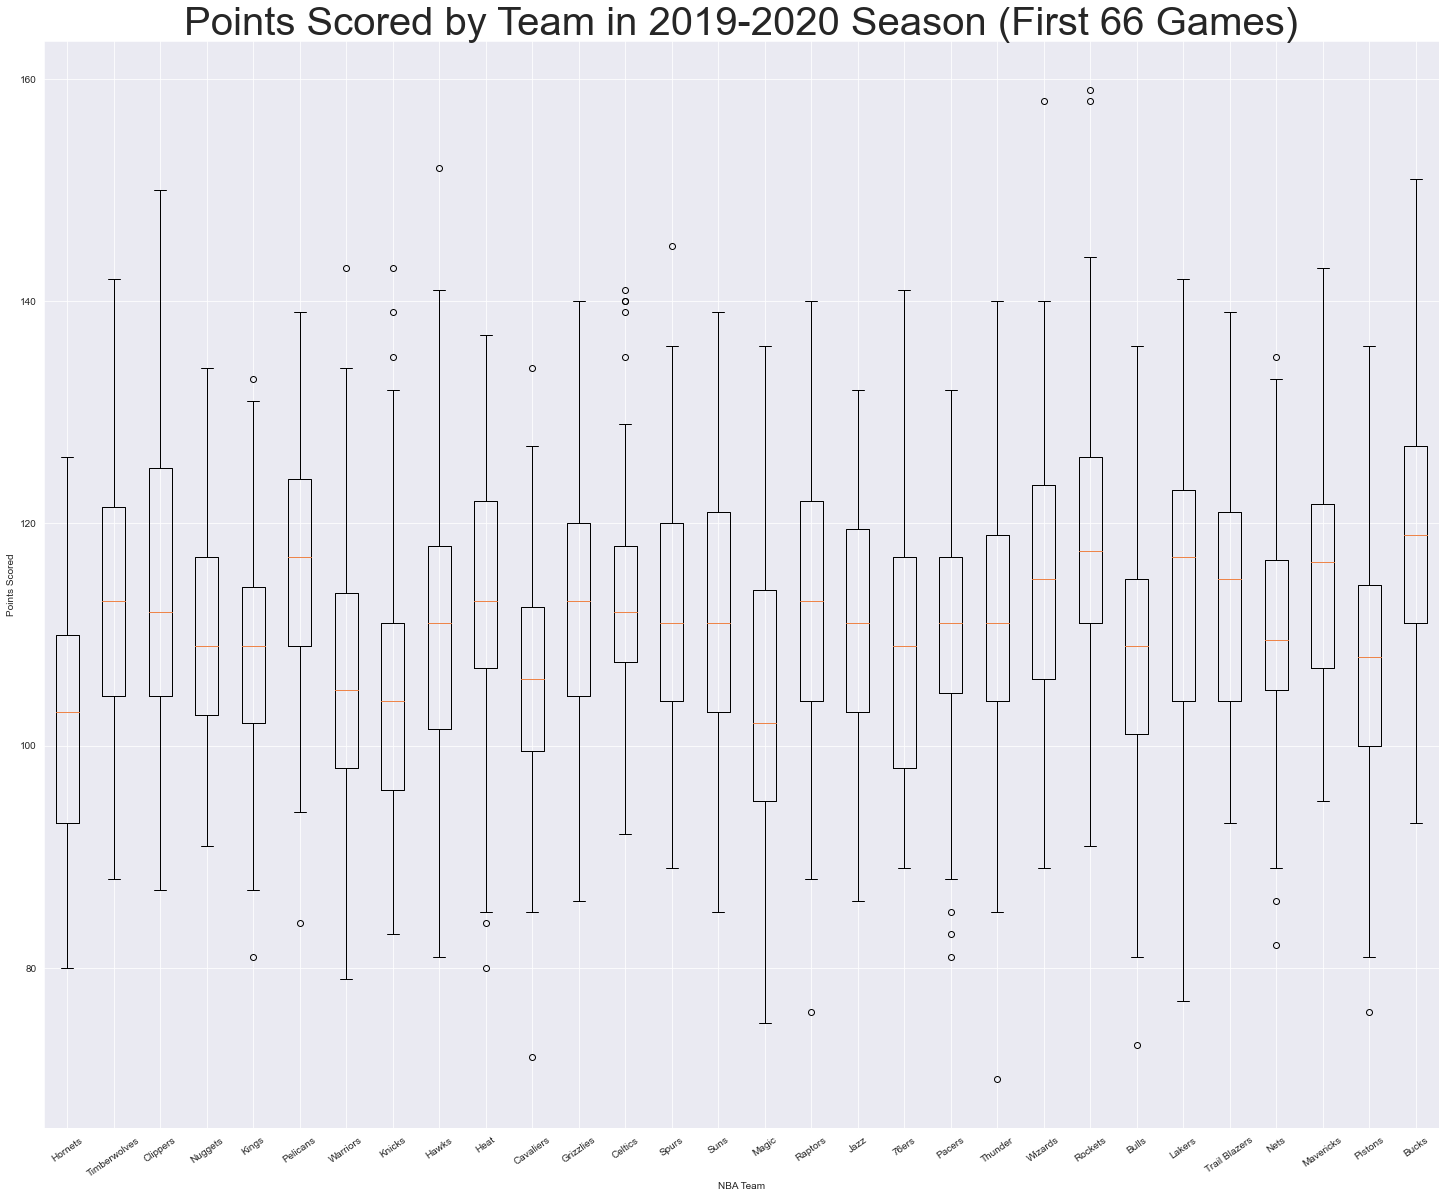

In [276]:
fig,ax = plt.subplots(figsize=(25,20))

ax.boxplot([v for k,v in list_team_PTS_season_2019.items()]);

xticklabels=[k for k,v in list_team_PTS_season_2019.items()]
ax.set_xticklabels(xticklabels,rotation=35)

ax.set_title('Points Scored by Team in 2019-2020 Season (First 66 Games)',fontsize=40)
ax.set_xlabel('NBA Team')
ax.set_ylabel('Points Scored')

ax.yaxis.grid(True)
plt.savefig('images/points_scored_team_2019_boxplot.png')
plt.show()

# Players with the Highest 3-Point FG Percentage of  2019-2020 Season
*Mimimum 100 3PT Attempts

In [277]:
game_player_details = pd.read_csv('nba_games_data/games_details.csv')
game_details = pd.read_csv('nba_games_data/games.csv')

In [278]:
season_games = game_details[['GAME_ID','SEASON']]

season_2019 = season_games.merge(game_player_details, left_on='GAME_ID', right_on='GAME_ID')
season_2019 = season_2019[season_2019['SEASON'] == 2019]

In [279]:
season_2019.head()

,GAME_ID,SEASON,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,21900895,2019,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,NaN,27:08,...,4.00000,4.00000,8.00000,2.00000,2.00000,0.00000,0.00000,0.00000,8.00000,11.00000
1,21900895,2019,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,NaN,34:55,...,2.00000,18.00000,20.00000,6.00000,1.00000,0.00000,3.00000,2.00000,41.00000,22.00000
2,21900895,2019,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,NaN,26:25,...,2.00000,5.00000,7.00000,0.00000,0.00000,3.00000,0.00000,2.00000,16.00000,16.00000
3,21900895,2019,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,NaN,27:35,...,1.00000,6.00000,7.00000,5.00000,0.00000,1.00000,2.00000,0.00000,2.00000,14.00000
4,21900895,2019,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,NaN,22:17,...,1.00000,0.00000,1.00000,2.00000,1.00000,0.00000,3.00000,2.00000,4.00000,6.00000


In [280]:
def players_3pt_fg(df):
    list_players = []

    for player in season_2019['PLAYER_NAME'].unique():
        player_filtered = df[df['PLAYER_NAME'] == player]
        FG3M_player = player_filtered['FG3M'].sum()
        FG3A_player = player_filtered['FG3A'].sum()
        average_FG3 = round(FG3M_player/FG3A_player,4)
        list_players.append((player,FG3A_player,average_FG3))
    return list_players

list_players_3pt_fg = players_3pt_fg(season_2019)

In [281]:
filtered_100_list_players_3pt_fg = []

for i in list_players_3pt_fg:
    if i[1] > 100:
        filtered_100_list_players_3pt_fg.append(i)
        
filtered_100_list_players_3pt_fg[0:5]

[('Wesley Matthews', 270.0, 0.363),
 ('Giannis Antetokounmpo', 264.0, 0.3182),
 ('Brook Lopez', 284.0, 0.2958),
 ('Donte DiVincenzo', 222.0, 0.3243),
 ('Eric Bledsoe', 192.0, 0.3542)]

In [282]:
list_3FG_players = [i[0] for i in filtered_100_list_players_3pt_fg]
x_3FG_attempts = [i[1] for i in filtered_100_list_players_3pt_fg]
y_3FG_percentage = [i[2] for i in filtered_100_list_players_3pt_fg]

df_3FG = pd.DataFrame({'Players':list_3FG_players,'3FG_Attempts':x_3FG_attempts,'3FG_Percentage':y_3FG_percentage})

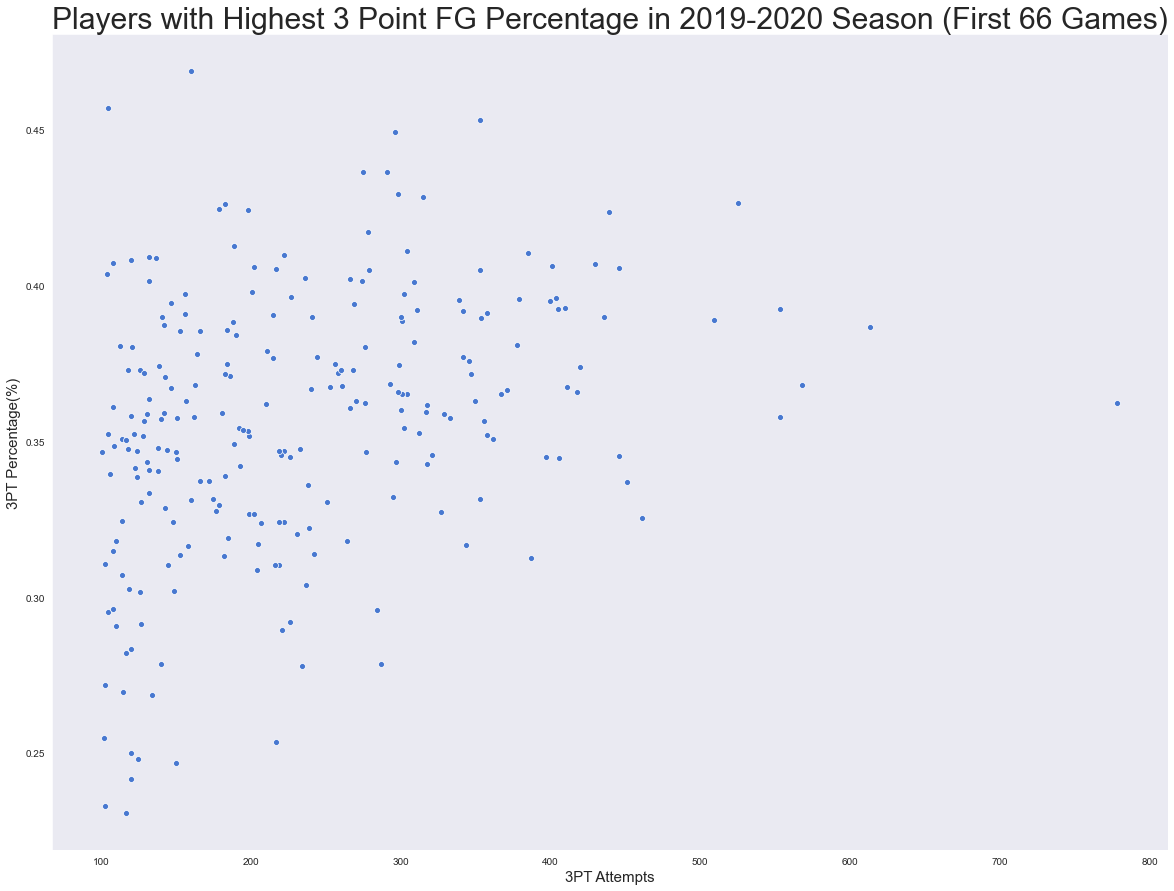

In [283]:
fig = plt.figure(figsize=(20,15))
ax = sns.scatterplot(x=x_3FG_attempts, y=y_3FG_percentage)
ax.set_title('Players with Highest 3 Point FG Percentage in 2019-2020 Season (First 66 Games)',fontsize=30)
ax.set_xlabel("3PT Attempts",fontsize=15)
ax.set_ylabel("3PT Percentage(%)",fontsize=15)
ax.grid()
plt.savefig('images/players_highest_3FG_percentage_2019_scatterplot.png')
plt.show()

In [284]:
# Top 10 3FG Attempts
df_3FG_Attempts_top10 = df_3FG.sort_values(by=['3FG_Attempts'],ascending=False).iloc[0:10]

# Top 10 3FG Percentage
df_3FG_Percentage_top10 = df_3FG.sort_values(by=['3FG_Percentage'],ascending=False).iloc[0:10]

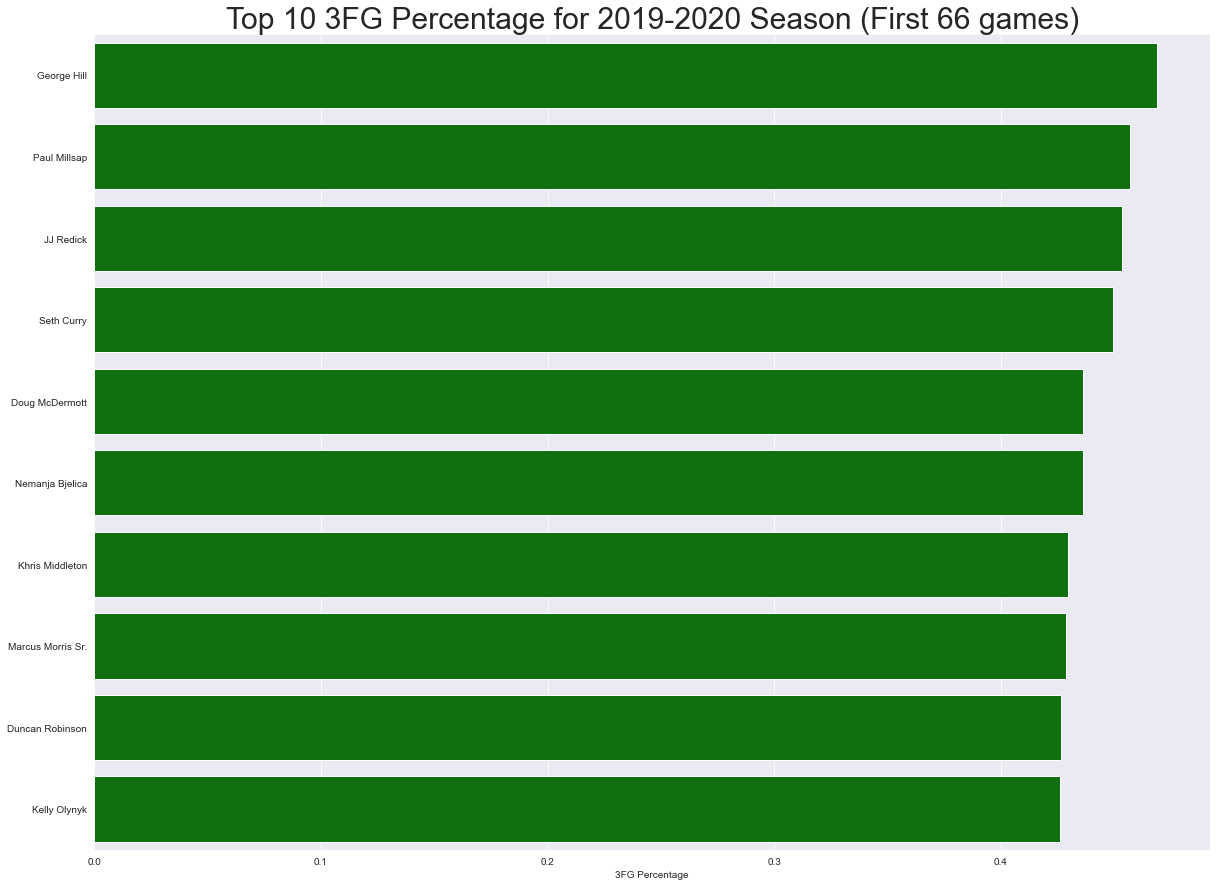

In [285]:
fig = plt.figure(figsize=(20,15))
ax = sns.barplot(x='3FG_Percentage',y='Players',data=df_3FG_Percentage_top10,color='g')
ax.set(ylabel='',xlabel='3FG Percentage')
ax = plt.title('Top 10 3FG Percentage for 2019-2020 Season (First 66 games)',fontsize=30)
plt.savefig('images/top_10_players_3FG_percentage_2019_barplot.png')
plt.show()

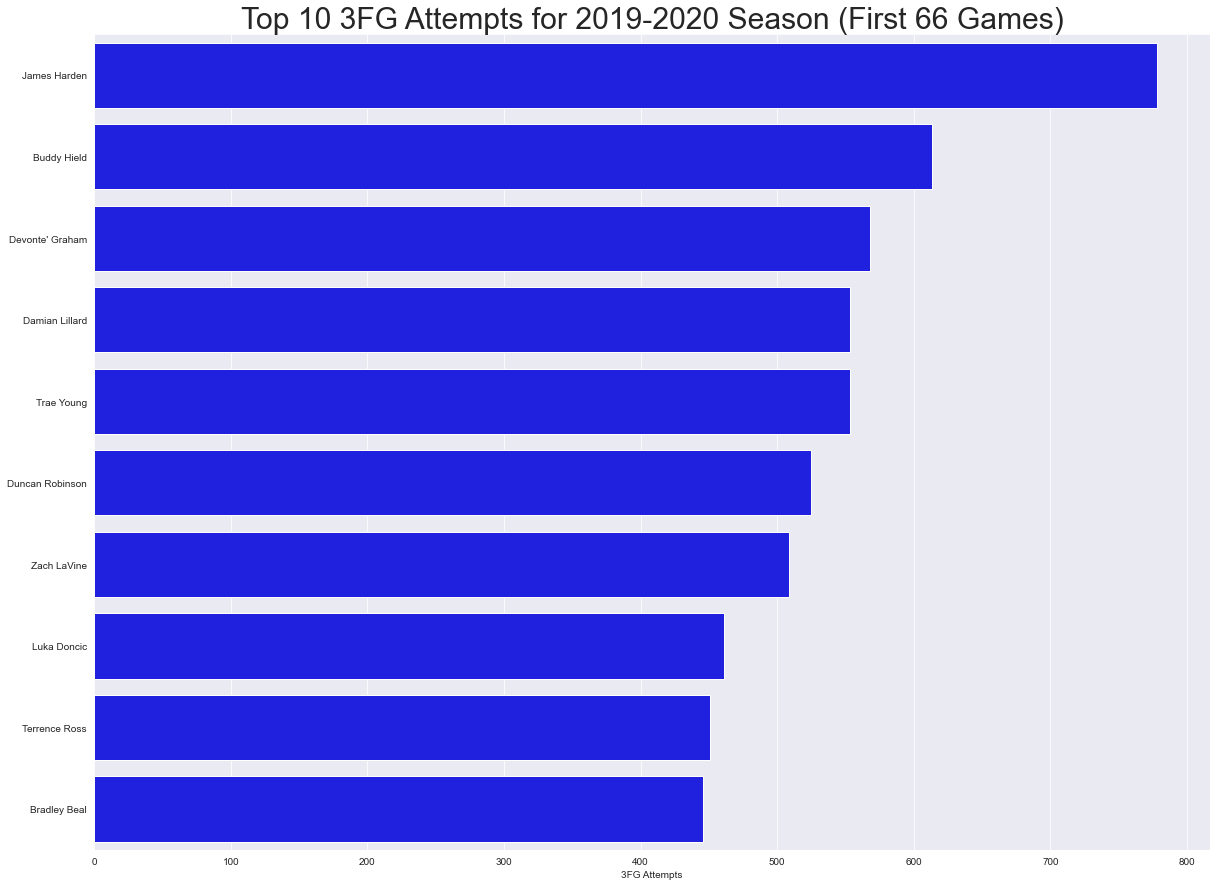

In [286]:
fig = plt.figure(figsize=(20,15))
ax = sns.barplot(x='3FG_Attempts',y='Players',data=df_3FG_Attempts_top10,color='b')
ax.set(ylabel='',xlabel='3FG Attempts')
ax = plt.title('Top 10 3FG Attempts for 2019-2020 Season (First 66 Games)',fontsize=30)
plt.savefig('images/top_10_players_3FG_attempts_2019_barplot.png')
plt.show()

In [287]:
highest_3fg_attempts = 0
highest_3fg__attempts_player = None
for i in filtered_100_list_players_3pt_fg:
    if i[1] > highest_3fg_attempts:
        highest_3fg_attempts = i[1]
        highest_3fg_attempts_player = i
        
print(f'Highest 3PT Attempts:{highest_3fg_attempts_player}')
        
highest_3fg_percentage = 0
highest_3fg_percentage_player = None
for i in filtered_100_list_players_3pt_fg:
    if i[2] > highest_3fg_percentage:
        highest_3fg_percentage = i[2]
        highest_3fg__percentage_player = i
        
print(f'Highest 3FG %:{highest_3fg__percentage_player}')

Highest 3PT Attempts:('James Harden', 778.0, 0.3625)
Highest 3FG %:('George Hill', 160.0, 0.4688)


# Players with the Highest FG Percentage of 2019-2020 Season
*Mimimum 100 FG Attempts

In [288]:
season_2019.head()

,GAME_ID,SEASON,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,21900895,2019,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,NaN,27:08,...,4.00000,4.00000,8.00000,2.00000,2.00000,0.00000,0.00000,0.00000,8.00000,11.00000
1,21900895,2019,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,NaN,34:55,...,2.00000,18.00000,20.00000,6.00000,1.00000,0.00000,3.00000,2.00000,41.00000,22.00000
2,21900895,2019,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,NaN,26:25,...,2.00000,5.00000,7.00000,0.00000,0.00000,3.00000,0.00000,2.00000,16.00000,16.00000
3,21900895,2019,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,NaN,27:35,...,1.00000,6.00000,7.00000,5.00000,0.00000,1.00000,2.00000,0.00000,2.00000,14.00000
4,21900895,2019,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,NaN,22:17,...,1.00000,0.00000,1.00000,2.00000,1.00000,0.00000,3.00000,2.00000,4.00000,6.00000


In [289]:
def players_pt_fg(df):
    list_players = []

    for player in season_2019['PLAYER_NAME'].unique():
        player_filtered = df[df['PLAYER_NAME'] == player]
        FGM_player = player_filtered['FGM'].sum()
        FGA_player = player_filtered['FGA'].sum()
        average_FG = round(FGM_player/FGA_player,4)
        list_players.append((player,FGA_player,average_FG))
    return list_players

In [290]:
list_players_fg = players_pt_fg(season_2019)

In [291]:
filtered_100_list_players_fg = []

for i in list_players_fg:
    if i[1] > 100:
        filtered_100_list_players_fg.append(i)
        
filtered_100_list_players_fg[0:5]

[('Wesley Matthews', 392.0, 0.4031),
 ('Giannis Antetokounmpo', 1126.0, 0.5568),
 ('Brook Lopez', 557.0, 0.4291),
 ('Donte DiVincenzo', 459.0, 0.4444),
 ('Eric Bledsoe', 619.0, 0.4782)]

In [292]:
list_FG_players = [i[0] for i in filtered_100_list_players_fg]
x_FG_attempts = [i[1] for i in filtered_100_list_players_fg]
y_FG_percentage = [i[2] for i in filtered_100_list_players_fg]

df_FG = pd.DataFrame({'Players':list_FG_players,'FG_Attempts':x_FG_attempts,'FG_Percentage':y_FG_percentage})

In [293]:
df_FG

,Players,FG_Attempts,FG_Percentage
0,Wesley Matthews,392.00000,0.40310
1,Giannis Antetokounmpo,1126.00000,0.55680
2,Brook Lopez,557.00000,0.42910
3,Donte DiVincenzo,459.00000,0.44440
4,Eric Bledsoe,619.00000,0.47820
...,...,...,...
367,Frank Kaminsky,315.00000,0.45710
368,Skal Labissiere,170.00000,0.53530
369,Luke Kennard,375.00000,0.44530
370,Al-Farouq Aminu,123.00000,0.34150


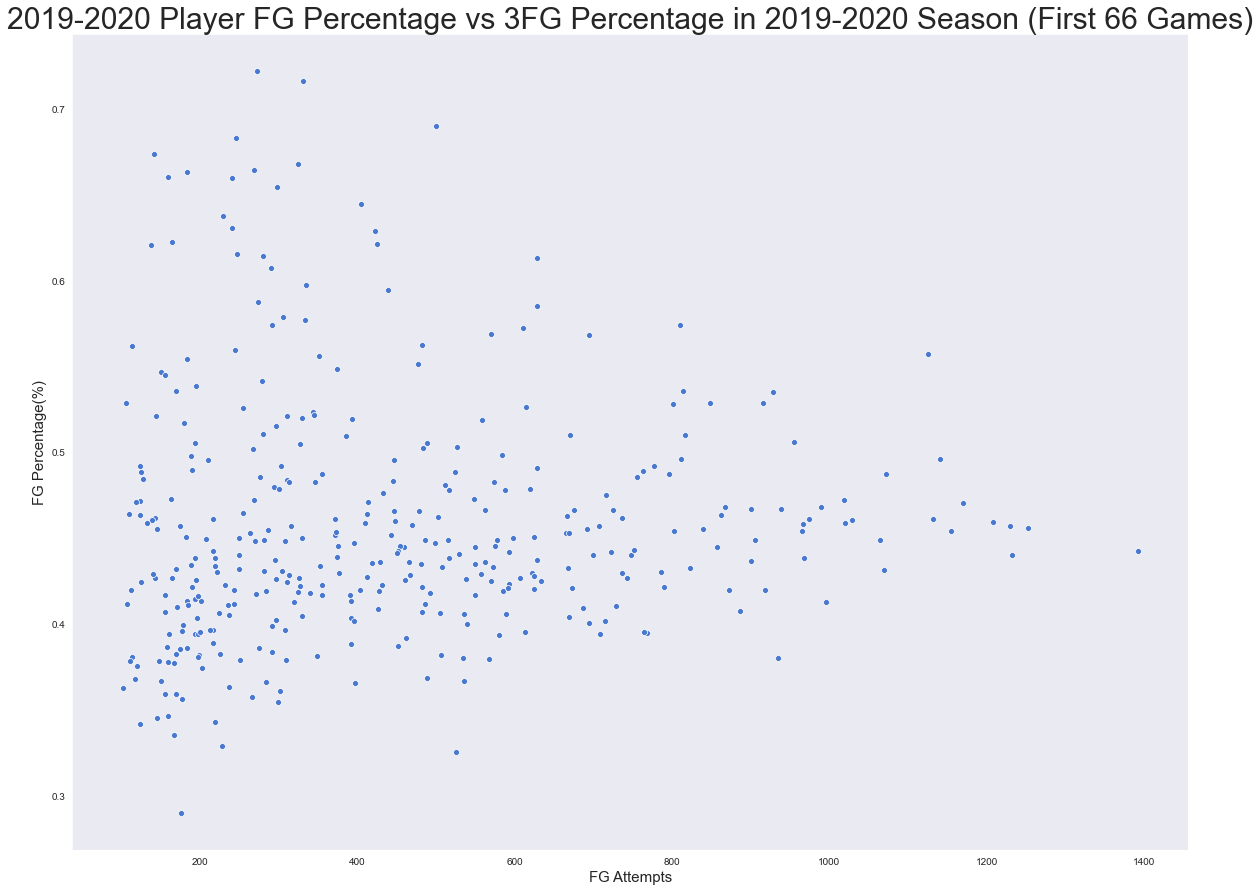

In [294]:
fig = plt.figure(figsize=(20,15))
ax = sns.scatterplot(x=x_FG_attempts, y=y_FG_percentage,data=df_FG)
ax.set_title('2019-2020 Player FG Percentage vs 3FG Percentage in 2019-2020 Season (First 66 Games)',fontsize=30)
ax.set_xlabel("FG Attempts",fontsize=15)
ax.set_ylabel("FG Percentage(%)",fontsize=15)
ax.grid()
plt.savefig('images/player_fg_3fg_percentage_2019_scatterplot.png')
plt.show()

In [295]:
# Top 10 FG Attempts
df_FG_Attempts_top10 = df_FG.sort_values(by=['FG_Attempts'],ascending=False).iloc[0:10]

# Top 10 FG Percentage
df_FG_Percentage_top10 = df_FG.sort_values(by=['FG_Percentage'],ascending=False).iloc[0:10]

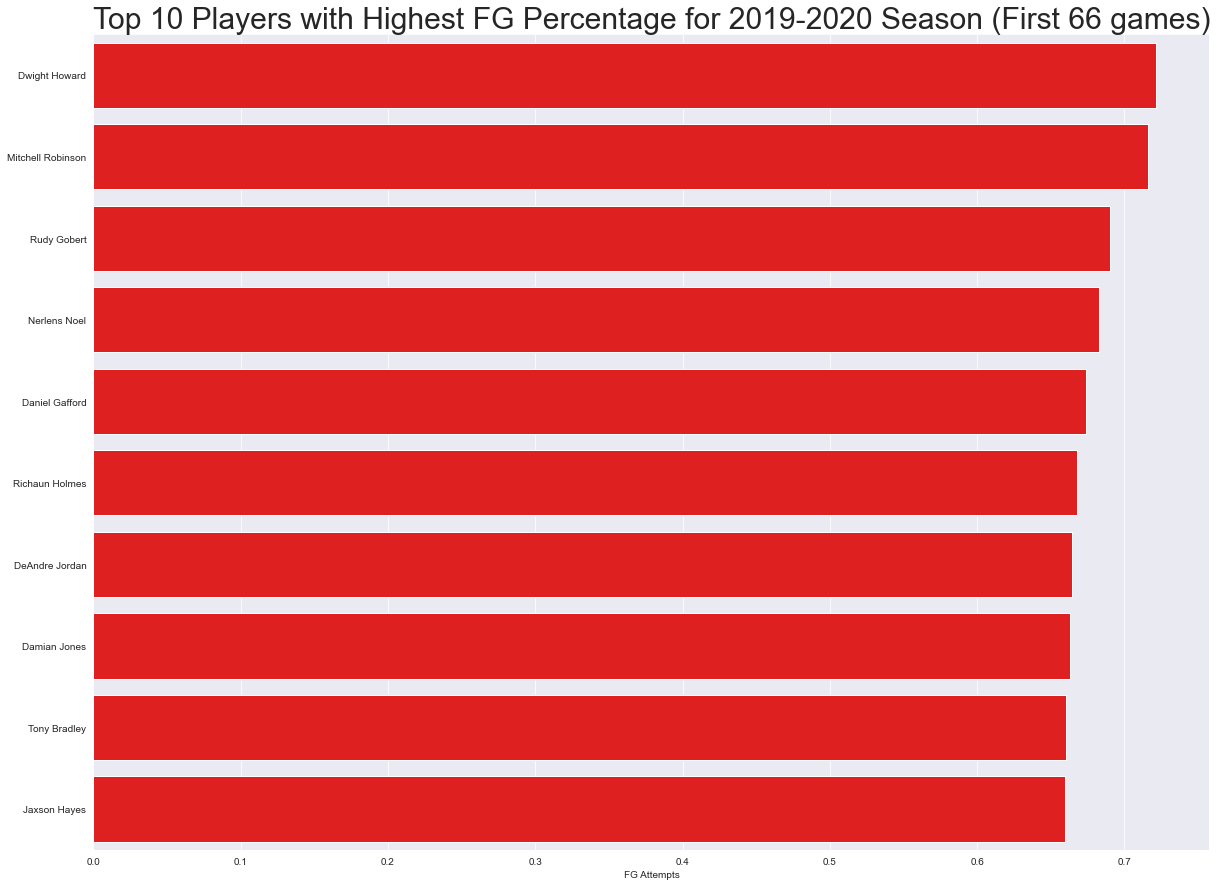

In [296]:
fig = plt.figure(figsize=(20,15))
ax = sns.barplot(x='FG_Percentage',y='Players',data=df_FG_Percentage_top10,color='r')
ax.set(ylabel='',xlabel='FG Attempts')
ax = plt.title('Top 10 Players with Highest FG Percentage for 2019-2020 Season (First 66 games)',fontsize=30)
plt.savefig('images/top_10_players_FG_percentage_2019_barplot.png')
plt.show()

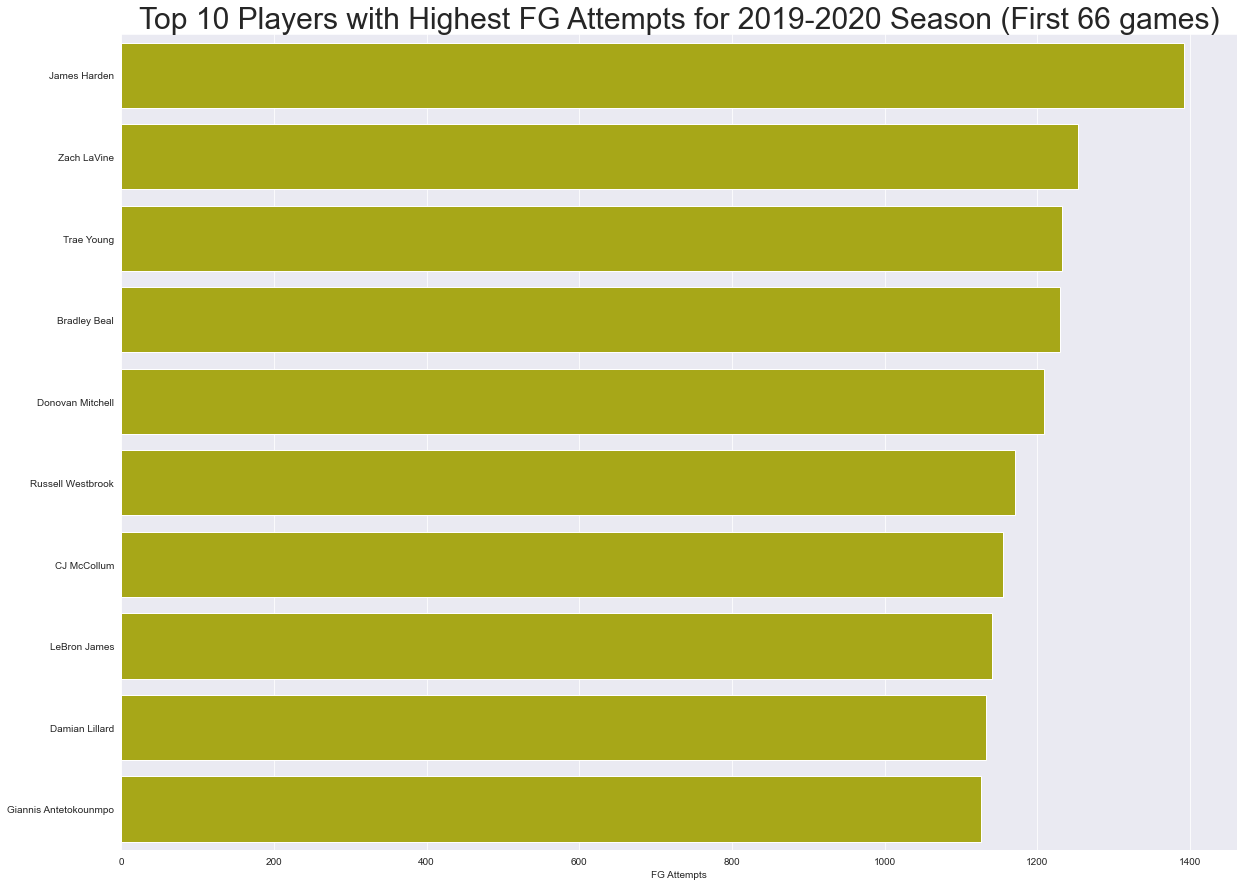

In [297]:
fig = plt.figure(figsize=(20,15))
ax = sns.barplot(x='FG_Attempts',y='Players',data=df_FG_Attempts_top10,color='y')
ax.set(ylabel='',xlabel='FG Attempts')
ax = plt.title('Top 10 Players with Highest FG Attempts for 2019-2020 Season (First 66 games)',fontsize=30)
plt.savefig('images/top_10_players_highest_FG_attempts_2019_boxplot.png')
plt.show()

In [298]:
highest_fg_attempts = 0
highest_fg__attempts_player = None
for i in filtered_100_list_players_fg:
    if i[1] > highest_fg_attempts:
        highest_fg_attempts = i[1]
        highest_fg_attempts_player = i
        
print(f'Highest FG Attempts:{highest_fg_attempts_player}')
        
highest_fg_percentage = 0
highest_fg_percentage_player = None
for i in filtered_100_list_players_fg:
    if i[2] > highest_fg_percentage:
        highest_fg_percentage = i[2]
        highest_fg__percentage_player = i
        
print(f'Highest FG %:{highest_fg__percentage_player}')

Highest FG Attempts:('James Harden', 1392.0, 0.4425)
Highest FG %:('Dwight Howard', 273.0, 0.7216)


# FG Percentage and 3PT Percentage Per Team in 2019-2020 Season

In [299]:
def team_FG3(season, team, data):
    
    team_data = data[(data['HOME_TEAM'] == team) | (data['VISITOR_TEAM'] == team)]
    team_data = team_data[team_data['SEASON'] == season]

    team_home = team_data[team_data['HOME_TEAM'] == team]
    team_away = team_data[team_data['VISITOR_TEAM'] == team]
    
    team_FG3 = []

    for team_FG3_home in team_home['FG3_PCT_home']:
        team_FG3.append(team_FG3_home)
    for team_FG3_away in team_away['FG3_PCT_away']:
        team_FG3.append(team_FG3_away)

    return team,round(sum(team_FG3)/len(team_FG3),4)

def list_team_FG3_season(season, data,list_teams):
    FG3 = {}
    for team in list_teams:
        result = team_FG3(season,team,data)
        FG3[result[0]] = result[1]
    return FG3

In [300]:
# list of teams and respective 3FG in 2019 season
list_team_FG3_2019 = list_team_FG3_season(2019,data,data['HOME_TEAM'].unique())

# list of teams and respective FG in 2019 season
list_team_FG_2019 = list_team_FG_2019

In [301]:
# process into DataFrame
pre_FG_data = {'Team':[k for k,v in list_team_FG_2019.items()], 
'FG_percentage':[v for k,v in list_team_FG_2019.items()], 
'FG3_percentage':[v for k,v in list_team_FG3_2019.items()]}

FG_dataframe = pd.DataFrame(data=pre_FG_data).set_index('Team',drop=True)
FG_dataframe

,FG_percentage,FG3_percentage
Team,,
Hornets,0.43190,0.34030
Warriors,0.43420,0.33170
Timberwolves,0.43550,0.36350
Magic,0.43570,0.35170
Knicks,0.44220,0.36280
Nets,0.44450,0.37580
Bulls,0.44470,0.33080
Hawks,0.44720,0.33860
Rockets,0.45490,0.33010


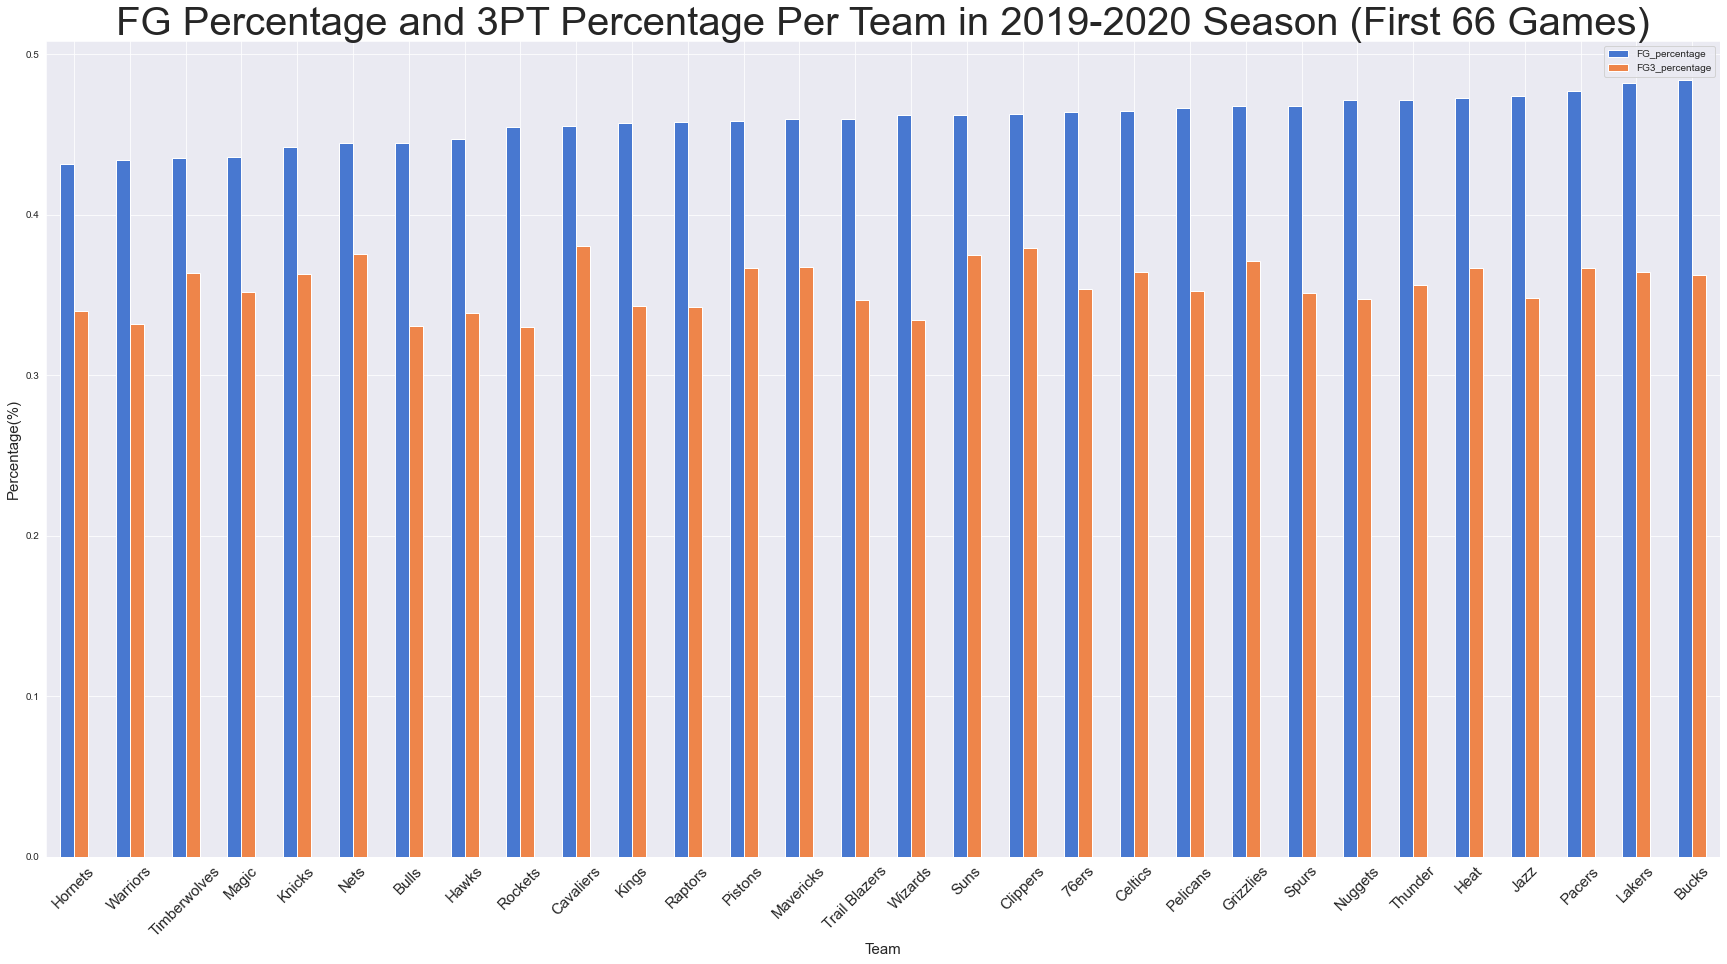

In [302]:
FG_dataframe.plot(kind='bar',stacked=False,figsize=(30,15))
plt.xticks(size=15,rotation=45)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Percentage(%)',fontsize=15)
plt.title('FG Percentage and 3PT Percentage Per Team in 2019-2020 Season (First 66 Games)',fontsize=40)
plt.savefig('images/teams_FG_3FG_percentage_2019_barplot.png')
plt.show();

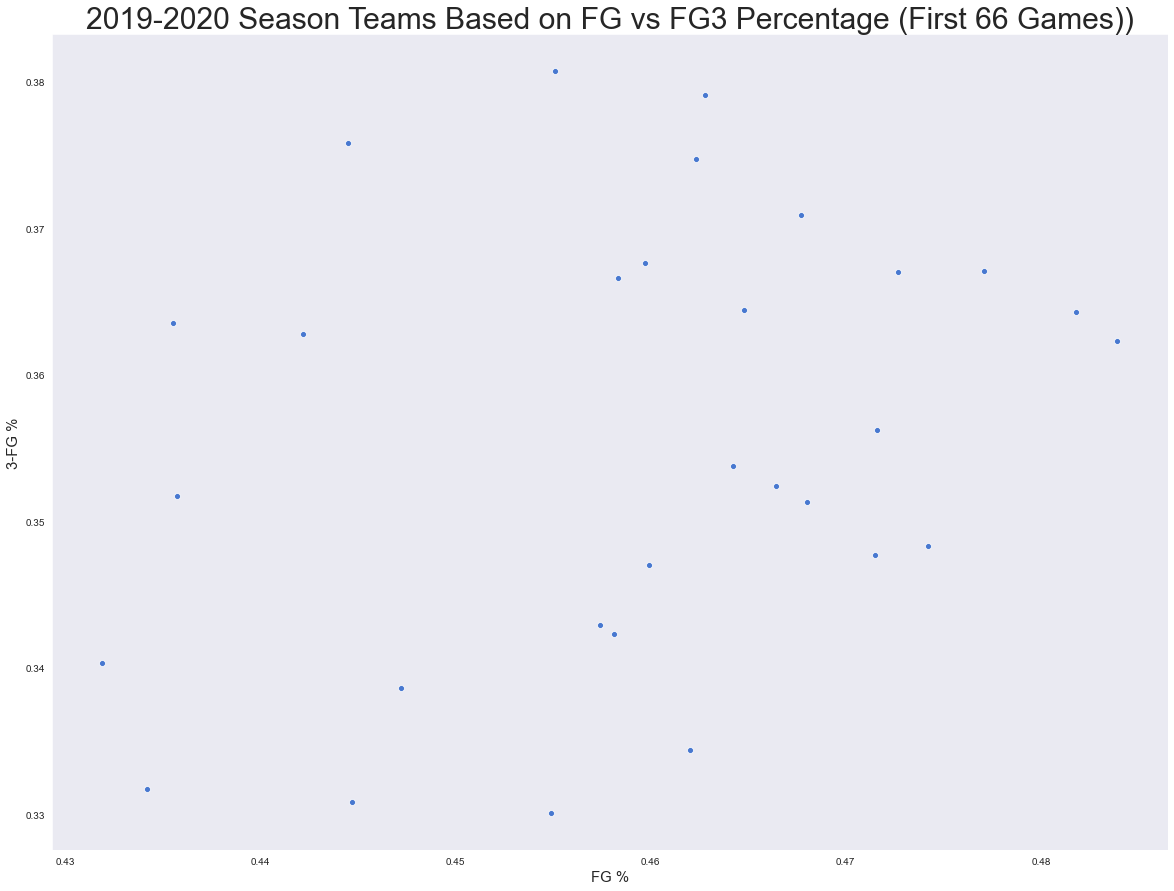

In [303]:
fig = plt.figure(figsize=(20,15))
ax = sns.scatterplot(x='FG_percentage',y='FG3_percentage',data=FG_dataframe.reset_index())
ax.set_title('2019-2020 Season Teams Based on FG vs FG3 Percentage (First 66 Games))',fontsize=30)
ax.set_xlabel("FG %",fontsize=15)
ax.set_ylabel("3-FG %",fontsize=15)
ax.grid()
plt.savefig('images/team_fg_3fg_percentage_2019_scatterplot.png')
plt.show()

# Statistics over Seasons (2004 - 2019)

In [304]:
data.head()

,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,...,BLK_home,PF_home,STL_home,TO_home,BLK_away,PF_away,STL_away,TO_away,HOME_TEAM,VISITOR_TEAM
0,2019,85.00000,0.35400,0.90000,0.22900,22.00000,47.00000,93.00000,0.40200,0.76200,...,8.00000,18.00000,7.00000,10.00000,6.00000,11.00000,7.00000,16.00000,Hornets,Bucks
1,2019,103.00000,0.37200,0.83300,0.35900,24.00000,39.00000,116.00000,0.50600,0.75000,...,3.00000,22.00000,6.00000,13.00000,8.00000,22.00000,8.00000,15.00000,Hornets,Bucks
2,2013,111.00000,0.43400,0.75000,0.58800,30.00000,43.00000,110.00000,0.43300,0.94100,...,7.00000,17.00000,2.00000,8.00000,8.00000,23.00000,8.00000,12.00000,Hornets,Bucks
3,2013,92.00000,0.44300,0.61300,0.20000,20.00000,54.00000,76.00000,0.33300,0.75000,...,4.00000,17.00000,5.00000,17.00000,9.00000,22.00000,10.00000,9.00000,Hornets,Bucks
4,2012,95.00000,0.46300,0.70800,0.44400,23.00000,52.00000,85.00000,0.39100,0.66700,...,5.00000,18.00000,6.00000,14.00000,3.00000,20.00000,6.00000,12.00000,Hornets,Bucks


In [305]:
table = pd.pivot_table(data, values=['FG_PCT_home','FT_PCT_home','FG3_PCT_home','PTS_home','REB_home',
                                          'AST_home','FG_PCT_away','FT_PCT_away','FG3_PCT_away','PTS_away',
                                          'REB_away','AST_away','BLK_home','BLK_away','STL_home','STL_away',
                                    'TO_home','TO_away','PF_home','PF_away'], index=['SEASON'], 
                       aggfunc=np.mean).reset_index()

table['FG_PCT'] = (data['FG_PCT_home'] + data['FG_PCT_away'])/2
table['FT_PCT'] = (data['FT_PCT_home'] + data['FT_PCT_away'])/2
table['FG3_PCT'] = (data['FG3_PCT_home'] + data['FG3_PCT_away'])/2
table['TOTAL_PTS'] = (data['PTS_home'] + data['PTS_away'])/2
table['TOTAL_ASTS'] = (data['AST_home'] + data['AST_away'])/2
table['TOTAL_REBS'] = (data['REB_home'] + data['REB_away'])/2
table['TOTAL_BLK'] = (data['BLK_home'] + data['BLK_away'])/2
table['TOTAL_STL'] = (data['STL_home'] + data['STL_away'])/2
table['TOTAL_TO'] = (data['TO_home'] + data['TO_away'])/2
table['TOTAL_PF'] = (data['PF_home'] + data['PF_away'])/2


In [306]:
main_table = table[['SEASON','FG_PCT','FT_PCT','FG3_PCT','TOTAL_PTS','TOTAL_REBS','TOTAL_ASTS','TOTAL_BLK',
                   'TOTAL_STL','TOTAL_TO','TOTAL_PF']].sort_values('SEASON')
main_table

,SEASON,FG_PCT,FT_PCT,FG3_PCT,TOTAL_PTS,TOTAL_REBS,TOTAL_ASTS,TOTAL_BLK,TOTAL_STL,TOTAL_TO,TOTAL_PF
0,2003,0.37800,0.83100,0.22750,89.00000,54.00000,21.00000,7.00000,7.00000,13.00000,14.50000
1,2004,0.43900,0.79150,0.31850,109.50000,46.00000,25.00000,5.50000,7.00000,14.00000,22.00000
2,2005,0.43350,0.84550,0.47250,110.50000,47.00000,29.50000,7.50000,5.00000,10.00000,20.00000
3,2006,0.38800,0.68150,0.24700,84.00000,46.00000,18.50000,6.50000,7.50000,13.00000,19.50000
4,2007,0.42700,0.68750,0.37700,90.00000,44.00000,23.00000,4.00000,6.00000,13.00000,19.00000
5,2008,0.45600,0.81350,0.19900,100.00000,41.50000,24.00000,8.50000,6.00000,15.00000,20.50000
6,2009,0.38750,0.80000,0.31600,95.00000,47.00000,23.00000,6.50000,6.00000,11.50000,21.00000
7,2010,0.46900,0.72800,0.21650,102.00000,42.00000,25.00000,6.00000,5.50000,10.00000,18.50000
8,2011,0.42350,0.79400,0.27950,95.50000,45.50000,24.00000,4.00000,4.50000,14.00000,20.00000
9,2012,0.43700,0.76900,0.24500,86.50000,41.50000,23.00000,3.00000,3.50000,7.50000,18.50000


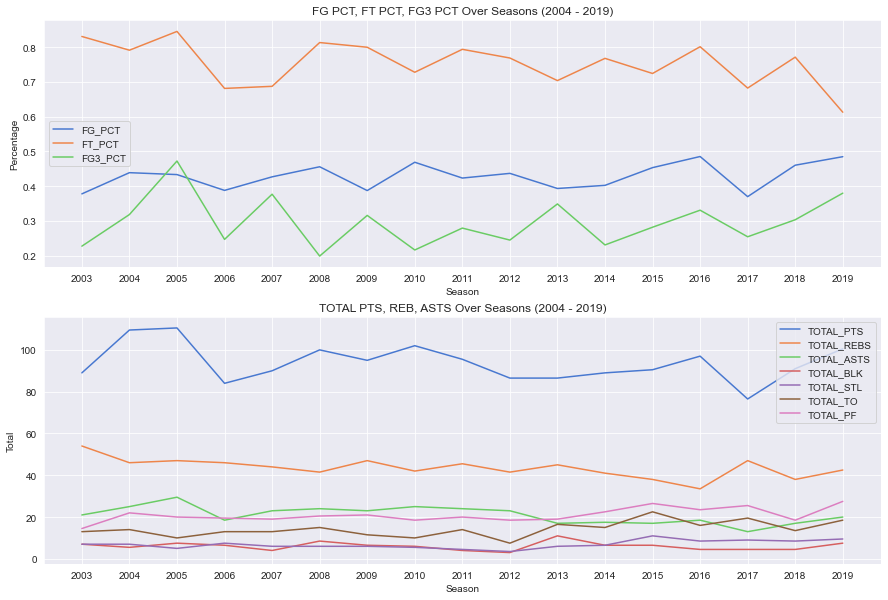

In [307]:
# sns.set_style('darkgrid')
# sns.set_palette("muted")
pct_outcomes = ['FG_PCT','FT_PCT','FG3_PCT']
plt.figure(figsize=(15, 10))

for outcome in pct_outcomes:
    ax1 = plt.subplot(2, 1, 1)
    ax1 = sns.lineplot(data = main_table, 
                       x = 'SEASON', 
                       y = outcome)
    ax1.set(xticks=main_table['SEASON'])
    ax1.set_title('FG PCT, FT PCT, FG3 PCT Over Seasons (2004 - 2019)')
    plt.legend(['FG_PCT','FT_PCT','FG3_PCT'])
    ax1.set(xlabel='Season', ylabel='Percentage')
    
outcomes = ['TOTAL_PTS','TOTAL_REBS','TOTAL_ASTS','TOTAL_BLK','TOTAL_STL','TOTAL_TO','TOTAL_PF']
for outcome in outcomes:
    ax1 = plt.subplot(2, 1, 2)
    ax1 = sns.lineplot(data = main_table, 
                       x = 'SEASON', 
                       y = outcome)
    ax1.set(xticks=main_table['SEASON'])
    ax1.set_title('TOTAL PTS, REB, ASTS Over Seasons (2004 - 2019)')
    plt.legend(['TOTAL_PTS','TOTAL_REBS','TOTAL_ASTS','TOTAL_BLK','TOTAL_STL','TOTAL_TO','TOTAL_PF'])
    ax1.set(xlabel='Season', ylabel='Total')
    
plt.savefig('images/statistics_2004_2019_lineplot.png')